# Linear Regression

Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 2 with solutions.

Please check out [the repository on GitHub](https://github.com/rickwierenga/CS229-Python/). If you spot any mistakes or inconcistencies, please create an issue. For questions you can find me on Twitter: [@rickwierenga](https://twitter.com/rickwierenga). Starring the project on GitHub means a ton to me!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Logistic Regression

---
Logistic regression is predicting in which category a given data point is. In binary classifiction, there are only two categories:

$$y \in \{0,1\}$$

In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset
data = pd.read_csv("train.csv") 

# Drop columns we won't use (e.g., id, CustomerId, Surname)
data = data.drop(columns=['id', 'CustomerId', 'Surname'])

# Encode categorical features
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])  # e.g., France=0, Spain=1, Germany=2
data['Gender'] = le.fit_transform(data['Gender'])        # Male=1, Female=0

# Separate features and target
X = data.drop(columns=['Exited']).values
y = data['Exited'].values

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))  # shape: (n_samples, n_features+1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Visualising the data
A blue cross means accepted. A yellow oval means rejected.

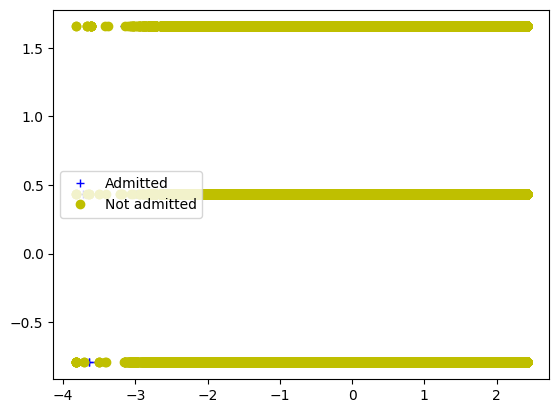

In [16]:
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

# Plot examples
plt.plot(X[pos, 1], X[pos, 2], 'b+', label='Admitted')
plt.plot(X[neg, 1], X[neg, 2], 'yo', label='Not admitted')
plt.legend()
plt.show()

### Sigmoid
The sigmoid function, or logistic function, is a function that asymptotes at 0 and 1. The value at 0 is $\frac{1}{2}$.

$h_\theta(x) = g(\theta^Tx) = g(z) = \frac{1}{1+ e^{-z}} = \frac{1}{1+ e^{-\theta^Tx}}$

A plot of the sigmoid function:
![sigmoid](notes/sigmoid.png)

We are going to use the sigmoid function to predict how likely it is that a given data point is in category 0. Our hypothesis:

$h_\theta(x) = P(y = 0|x;\theta)$

Because there are only two categories (in this case), we can derrive that:

$P(y = 0|x;\theta) + P(y = 1|x;\theta)= 1$

**Exercise**: Implement the sigmoid function in Python.

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Compute the Cost and Gradient

#### The cost function

The cost function in logistic regression differs from the one used in linear regression. The cost function in logistic regression:

$$J(\theta) = - \begin{bmatrix}\frac{1}{m}\displaystyle\sum_{i=1}^{m}-y^{(i)}\log h(x^{(i)}-(1-y^{(i)})\log(1-h_\theta(x^{(i)}))\end{bmatrix}$$

Assume our hypothesis for an example is wrong, the higher probability $h_\theta$ had predicted, the higher the penatly.

A vectorized version of the cost function:

$$J(\theta) = \frac{1}{m} ⋅(−y^T \log(h)−(1−y)^T \log(1−h))$$

**Exercise**: Implement the vectorized cost function in Python.

In [18]:
def compute_cost(theta, X, y):
    m = len(y)
    z = X @ theta
    h = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

#### The gradient

The gradient is the step a minimization algorithm, like gradient descent, takes to get to the (local) minimum. Note that this step can be taken in a higher dimension and hence the gradient is a vector. In the previous programming exercise we used gradient descent. This time, we are going to use an algorithm called conjugate gradient to find the minimum. How that algorithm works is beyond the scope if this course. If you are interested, you can learn more about it [here](https://en.wikipedia.org/wiki/Conjugate_gradient_method).

The partial derrivative or $J(\theta)$:

$$\frac{\delta}{\delta\theta_J} = \frac{1}{m}\displaystyle\sum_{i = 1}^{m} \begin{bmatrix}(h_\theta(x^{(i)}) - y^{(i)}\end{bmatrix}x_j^{(i)}$$

Vectorized:

$$\frac{\delta}{\delta\theta_J} = \frac{1}{m} \cdot X^T \cdot (g(X\cdot\theta)-\vec{y})$$

**Exercise**: Write a function to compute the gradient.

In [19]:
def compute_gradient(theta, X, y):
    m = len(y)
    z = X @ theta
    h = sigmoid(z)
    dw = (1 / m) * np.dot(X.T, (h - y))
    return dw

Test the cost and gradient function. We expect $J \approx 0.693$ and $\frac{\delta}{\delta\theta_J} \approx \begin{bmatrix}-0.1000 & -12.0092 & -11.2628 \end{bmatrix}$

In [20]:
initial_theta = np.zeros(n)
y = y.reshape(m)
print('Cost: \n{}\n'.format(compute_cost(initial_theta, X, y)))
print('Gradient: \n{}'.format(compute_gradient(initial_theta, X, y)))

ValueError: cannot reshape array of size 165034 into shape (47,)